# Perceptron

Perceptron and Logistic Regression ONLY DIFFER by their activation functions:

- Perceptron: heaviside step function (i.e. `1.0 if activation >= 0.0 else 0.0`)

- Logistic Regression: sigmoid (i.e. `1.0 / (1.0 + np.exp(-activation))`)

<IPython.core.display.Javascript object>


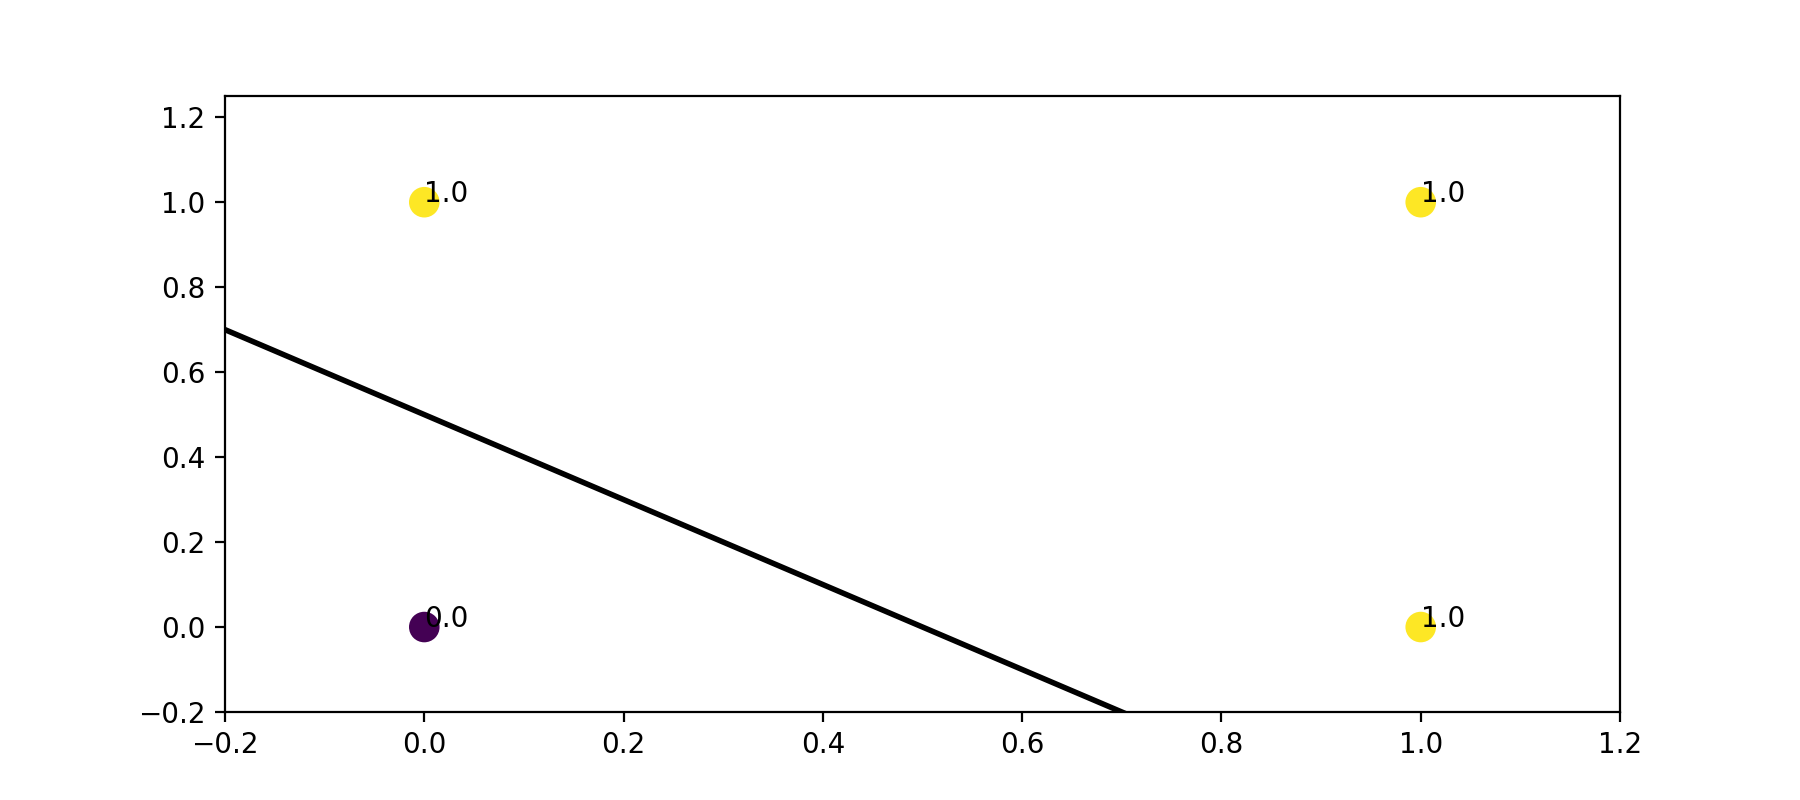

In [17]:
# Clear variables from previous execution.
%reset -f
# Enable interactive charts.
%matplotlib notebook

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Iterations ⇒ Accuracy
num_iterations = 5

# Speed in which new value is learned and old value is forgotten.
# (Max = 1, memory like a sieve, Min = 0.000...1)
learning_rate = 1

# Input: 4x Observations. 2x Features.
training_input = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)

# Labels: OR(Feature1, Feature2).
training_labels = np.array([0, 1, 1, 1], np.float32)

# Extract shape of data.
num_samples, num_features = np.shape(training_input)

# Weights: 1 per edge (so 1 per feature... so 2).
weights = np.zeros(num_features, np.float32)

# Biases: 1 per neuron (so 1 in a perceptron!)
biases = np.zeros(1, np.float32)

# Training. Iteratively updates weights and bias. The process represents
# a gradient descent of sorts (not optimized, i.e. not stochastic).
for k in range(num_iterations):
    # Weigh and combine neuron inputs using a LINEAR equation. Called the 'activation'.
    # Specifically, we multiply each feature by its weight, then sum them (i.e. perform
    # a dot product), then add the neuron's bias. Initially, the result is always 0 (as
    # weights and biases are initialized to 0).
    activation = training_input.dot(weights) + biases # [a,b,c,d]
    
    # Activation function (aka transfer function). Must be a NON-LINEAR equation (as this
    # allows the model to predict non-linear relationships). It's often called the activation
    # function because it's a 'function of the activation'. Here we use a unit step function,
    # aka 'heaviside step function', because it outputs 0 to 1, and our labels are 0 to 1.
    prediction = np.where(activation >= 0.0, 1.0, 0.0) # [a,b,c,d]
    
    # Loss function. This is simply a delta, rather than absolute error, squared error, etc.
    # Error points in the DIRECTION and MAGNITUDE the label needs to change (normalized
    # between -1 and 1).
    error = training_labels - prediction # [a,b,c,d]
    
    # Backpropogation (i.e. update the model's parameters)
    # -  Prediction = Features · Weights + Bias, so if we increase weights & bias, we increase
    #    the prediction, and visa-versa.
    # -  As previously mentioned, the 'error' defines the direction and magnitude to move in.
    
    # 1. Update bias (i.e. sum the errors from each sample. Gives us a scalar.).
    biases_delta = np.sum(error)
    biases = biases + learning_rate * biases_delta
    
    # 2. Update weights (i.e. for each feature: multiply by the error for each sample and sum the
    #    products (i.e. dot product). Gives us a vector of the same length as the features.)
    #
    #    Requires us to transpose input from AxB matrix to BxA matrix, where len(A)=len(error).
    #    This allows each element of A to be multiplied by its corresponding element in 'error'.
    #    I.e. multiply each feature by the error, and repeat for each sample. Finally, for each
    #    feature, sum the results of each input sample.
    weights_delta = np.transpose(training_input).dot(error) # [a,b]
    weights = weights + learning_rate * weights_delta
        
# Scatter inputs across X and Y axis, with the label used for colouring for each point.
plt.figure(figsize=(9,4))
plt.scatter(training_input[:, 0], training_input[:, 1], c=training_labels, s=100, cmap='viridis')

# Run Prediction (i.e. validate):
validation_predictions = np.where(training_input.dot(weights) + biases >= 0.0, 1.0, 0.0)

# Scatter predictions over the top of inputs.
for i, txt in enumerate(validation_predictions):
    plt.annotate(txt, (training_input[i, 0], training_input[i, 1]))

# CAVEAT ON BELOW: Line is plotted against the logistic regression model (i.e. sigmoid instead
# of unit step function). This is because the unit step function is a non-invertible function,
# so the model cannot be rearranged in terms of X1 due to the non-unique outputs generated by
# the ternary operator in the step function).
# ---
# Draw a line that depicts which pairs of feature values (i.e. x=X0 and y=X1) represent a 50%
# probability of being classified as a '1' or a '0'. Anything above this line represents a '1'
# and anything below represents a '0'.
# - To draw this line, we take the left-most edge of the chart, and right-most edge of the
#   chart as 2 values for the X0 feature (this gives us the values to use on the x-axis).
# - We assume a prediction of 0.5.
# - We then solve for the X1 feature (the y-axis) by rearranging the model in terms of X1:
#   1. Start with the model (see caveat above!):
#        Prediction = (1.0 / (1.0 + np.exp(-(W0*X0 + W1*X1 + B))))
#   2. Rearrange in terms of X1 (the feature we're trying to deduce):
#        X1 = ((ln((1.0 / Prediction) - 1.0) * -1) - (B + W0*X0)) / W1
#   3. Given the prediction of 0.5 (the minimum required for a positive classification):
#        X1 = ((ln((1.0 / 0.5) - 1.0) * -1) - (B + W0*X0)) / W1
#   4. Simplify equation (natural log simplifies to 0 with these variables):
#        X1 = (-1 * (B + W0*X0)) / W1
# - X coordinates: Feature 1 (X0)
# - Y coordinates: Feature 2 (X1)
line_x = np.array([np.min(training_input[:, 0] - 0.2), np.max(training_input[:, 1]+0.2)])
line_y = (-1 * (biases + weights[0]*line_x)) / weights[1]
plt.plot(line_x, line_y, color='k', linewidth=2)

# Bound axis for chart.
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.25])
plt.show()